# Определение перспективного тарифа для телеком-компании

***Постановка задачи***

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет в рамках задачи, поставленной коммерческим департаментом, необходимо провести предварительный анализ тарифов на небольшой выборке клиентов для опредление наиболее выгодного с точки зрения прибыли для компании.

В распоряжении данные 500 пользователей «Мегалайна» за 2018 год. Необходимо проанализировать поведение клиентов и определить наиболее перспективный тариф.

*Примечания*:


1. Компания «Мегалайн» округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

2. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 Мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

***Описание тарифов***

**Тариф «Смарт»**

- Ежемесячная плата: 550 рублей
- Включено: 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1 минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

- Ежемесячная плата: 1950 рублей
- Включено: 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета: 1 минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучение данных и педобработка данных

In [1]:
import math as mt #импоpт необходимых библиотек и методов
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import warnings

from math import factorial
from scipy import stats as st

In [2]:
warnings.simplefilter('ignore')#отключение предупреждений

In [3]:
calls = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_4(sp6)\calls.csv')#чтение предоставленных датасетов с информацией об использовании тарифов
internet = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_4(sp6)\internet.csv')
messages = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_4(sp6)\messages.csv')
tariffs = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_4(sp6)\tariffs.csv')
users = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_4(sp6)\users.csv')

### Ознакомление с данными и их изучение

Для изучения данных создадим фунцию, позволяющую оценить данные, представленные в каждом датасете. Функция будет включать блок просмотра вывовда первых значений, блок общей информации о таблице, блок определения количества пропущенных значений, проверку на наличие полных дубликатов, блок описательных статистик.

In [4]:
def introduction(row):
    print('head:')
    print(row.head())
    print()
    print('columns_info:')
    print(row.info())
    print()
    print('not_avalible:')
    print(row.isna().sum())
    print()
    print('number_duplicates:', row.duplicated().sum())
    print()
    print('describe:')
    print(row.describe())
    print()

**Изучние стобца 'calls' - информация о звонках**

In [5]:
introduction(calls) # изучение таблицы calls


head:
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000

columns_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

not_avalible:
id           0
call_date    0
duration     0
user_id      0
dtype: int64

number_duplicates: 0

describe:
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max

Таблица calls (информация о звонках) согласно описанию содержит следующую информацию:

    - id — уникальный номер звонка;
    - call_date — дата звонка;
    - duration — длительность звонка в минутах;
    - user_id — идентификатор пользователя, сделавшего звонок.

Таблица включает 202607 строк. Пропуски и дубликаты отсутсвуют. Длительность звонков составляет от 0 минут (пропущенные звонки) до 38 минут.

**Изучние стобца 'internet' - информация об интернет-сессиях**

In [6]:
introduction(internet) # изучение таблицы calls


head:
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2           2  1000_2  1197.26   2018-06-25     1000
3           3  1000_3   550.27   2018-08-22     1000
4           4  1000_4   302.56   2018-09-24     1000

columns_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

not_avalible:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

number_duplicates: 0

describe:
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426  

Таблица internet (информация об интернет-сессиях) согласно описанию содержит следующую информацию:

    - id — уникальный номер сессии;
    - mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);
    - session_date — дата интернет-сессии;
    - user_id — идентификатор пользователя.

Таблица включает 149396 строк. Пропуски и дубликаты отсутсвуют. Трафик интернет-сессий составляет от 0 Мб(вероятно это попытки выхода в интернет в отсутсвии оплаты за услуги) до 1724 Мб. В таблице присутсвует незаявленный столбец 'Unnamed: 0', который вузуально совпадает со значениями индексов строк.

In [7]:
(internet['Unnamed: 0'] == internet.index).unique() 
#проверка на полное сопадение индексаов таблицы и значений столбца 'Unnamed: 0'

array([ True])

Как видно из представленной выше проверки, значения столбца 'Unnamed: 0' полностью совпадают со значениями индексов строк таблицы internet и не несут никакой смысловой нагрузки. Вероятно этот столбец создан ошибочно при формировании таблицы, его можно удалить для уменьшения объема обрабатываемых данных.

In [8]:
internet = internet.drop(['Unnamed: 0'], axis=1)

**Изучние стобца 'messages' - информация об сообщениях**

In [9]:
introduction(messages)

head:
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000

columns_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

not_avalible:
id              0
message_date    0
user_id         0
dtype: int64

number_duplicates: 0

describe:
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000



Таблица messages (информация об сообщениях) согласно описанию содержит следующую информацию:

    -  id — уникальный номер сообщения;
    -  message_date — дата сообщения;
    -  user_id — идентификатор пользователя, отправившего сообщение.

Таблица включает 123036 строк. Пропуски и дубликаты отсутсвуют. Каждая строка по сути отражает факт отправки одного сообщения.

**Изучние стобца 'tariffs' - информация о тарифах**

In [10]:
introduction(tariffs)

head:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  

columns_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None

not_avalible:
messages_included        0
mb_per_mon

Таблица tariffs (информация о тарифах) согласно описанию содержит следующую информацию:

    -  tariff_name — название тарифа;
    -  rub_monthly_fee — ежемесячная абонентская плата в рублях;
    -  minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
    -  messages_included — количество сообщений в месяц, включённых в абонентскую плату;
    -  mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
    -  rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
    -  rub_per_message — стоимость отправки сообщения сверх тарифного пакета;
    -  rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).
    
Таблица включает 2 строки - информация о тарифах "smart" и "ultra". Пропуски и дубликаты отсутсвуют. Каждая строка  - характеристика тарифа: количество звонков, сообщений и объем интерент-трафика, включенного в лимит, а также нарифы на объемы услуг сверх лимита.

**Изучние стобца 'users' - информация о пользователях**

In [11]:
introduction(users)

head:
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  

columns_info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

not_avalible:
user_i

Таблица users (информация о пользователях) согласно описанию содержит следующую информацию:

    -  user_id — уникальный идентификатор пользователя;
    -  first_name — имя пользователя;
    -  last_name — фамилия пользователя;
    -  age — возраст пользователя (годы);
    -  reg_date — дата подключения тарифа (день, месяц, год);
    -  churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
    -  city — город проживания пользователя;
    -  tarif — название тарифного планаю
    
Таблица включает 500 строк - информация об уникальных пользоватеелях. Дубликаты отсутсвуют. В столбце 'churn_date'  присутствует 38 пропусков, согласно описанию пропуски в этом столбце означают факт использования тарифа на момент выгрузки данных. Минимальный возраст пользователей - 18 лет, максимальный - 75.

Проведем проверку на предмет наличия в таблице пользователей, которые использовали или используют 2 тарифа одновременно.

In [12]:
chek_2tar = users.pivot_table(index='user_id', values='tariff', aggfunc='count').reset_index()
chek_2tar['tariff'].unique()
#проверка двух разных тарифов для одного пользователя

array([1], dtype=int64)

Пользователей использующих или использовавших 2 тарифа не выявлено.

Приведем значения столбцов подключения и прекращения пользования тарифом ('reg_date', 'churn_date') к формату даты.

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Проверим факт того, что для всех каналов связи присутсвует информация о том же колличестве пользователей, которое указано в таблице с информацией об уникальных пользователях.

In [14]:
display(calls.user_id.nunique(), internet.user_id.nunique(), messages.user_id.nunique())

492

497

426

В таблице с информацией о звонках присутсвуют данные о 492 уникальных пользователях, в таблице об интерент-сессиях - о 497 пользователях, в таблице об отправленных сообщениях - о 429 пользователях. Это указывает на то, что отсутсвующие данные либо не получены по какой-либо ошибке, либо пользователи не используют все заявленные услуги, при чем в различных сочетаниях.

### Вывод

Для анализа тарифов оператора сотовой связи предоставлен датасет, включающий 5 таблиц:
 - calls - данные о совершенных клиентами звонках;
 - internet - данные об интернет сессиях;
 - messages  - данные об отправленных  SMS сообщения;
 - tariffs - данные о параметрах тарифов
 - users - данные о клиетнтах.
 
 При первичном анализе явных ошибок и дубликатов в данных не обнаружено. Пропуски присуисвуют только в таблице 'users' в столбце 'churn_date' - дата прекращения пользования тарифом, пропуски не требуют заполнения, так как отсутсвие данных свидетельствует о том, что клиент использовал тариф на момент выгрузки данных. Нулевые значения в длительности звонков - пропущенные звонки. Нулевые интернет-сессии  - это работа отдельных программ (пинг данных) или попытка выхода в интернет в отсутсвии оплаты тарифа. В таблице 'internet' обнаружен незаявленный в описании столбец 'Unnamed: 0', значения которого полностью соответствует индексам строк таблицы, столбец удален.

## Подготовка данных - определние дополнительных параметров для анализа данных

Для последующего анализа данных определим помесячные значения использования параметров тарифа (количество израсходованных минут и количество звонков, количество сообщений и объём использованного интернет-трафика) и выручку с каждого пользователя.

### Объединение таблиц на основе сводных данных по месяцам.

Для получения данных по месяцам с использованием сводных таблиц введем в каждый из датасетов, характеризующих объемы услуг связи, дополнительный столбец 'montn' - месяц, соответствующий дате использования того или иного канала коммуникации.

In [15]:
def date_to_month(data, ceil_name): #функция приведения данных к формату даты и определения месяца использования тарифа
    data[ceil_name] = pd.to_datetime(data[ceil_name], format='%Y-%m-%d')
    data['month']=data[ceil_name].dt.to_period('M')       

In [16]:
date_to_month(calls, 'call_date')

In [17]:
date_to_month(messages, 'message_date')

In [18]:
date_to_month(internet, 'session_date')

Исходя из особеннстей тарификации, оператор для подсчета использованного времени разговора округляет время звонков до целых минут. Добавим в таблицу 'calls' стобец 'round_duration' - округленное до целых значений время одного разговора.

In [19]:
calls['round_duration'] = np.ceil(calls['duration'])
#добавление столбца 'round_duration' в таблицу 'calls'

Получим сводные таблицы с помесячными объемами использовния тарифов для каждого из трех каналов коммуникации.

In [20]:
pt_month_calls = calls.pivot_table(index=['user_id', 'month'], values='round_duration', aggfunc=['sum', 'count'])
#сводная таблица с подсчетом количества минут разговоров и числа сделанных звонков за месяц

In [21]:
pt_month_messages = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
#сводная таблица с подсчетом количества отправленных сообщений за месяц

In [22]:
pt_month_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
#сводная таблица с подсчетом объема интернет-трафика за месяц

Исходя из особенностей тарификации, оператор для подсчета использованного web-трафика округляет общий объем трафика за месяц в бо́льшую сторону. Добавим в таблицу 'pt_month_internet' стобец 'gb_used' - округленное до целых Гб значение интернет-трафика.

In [23]:
pt_month_internet['gb_used'] = np.ceil(pt_month_internet / 1024)

Объединим полученные данные в одну таблицу.

In [24]:
df = pd.merge(pt_month_calls, pt_month_messages, on=["user_id", "month"], how='outer')
#объединение таблиц pt_month_calls и pt_month_messages

In [25]:
df = pd.merge(df, pt_month_internet, on=["user_id", "month"], how='outer')
#объединение таблиц df и pt_month_internet

In [26]:
df.columns=['calls_duration_min', 'calls_qty', 'messages_qty', 'mb_used', 'gb_used']
#переименование столбцов

In [27]:
df = df.reset_index() #сброс индексов

In [28]:
df.tail()

,user_id,month,calls_duration_min,calls_qty,messages_qty,mb_used,gb_used
3209,1489,2018-09,NaN,NaN,32.0,17206.30,17.0
3210,1489,2018-10,NaN,NaN,21.0,19559.44,20.0
3211,1489,2018-11,NaN,NaN,20.0,17491.56,18.0
3212,1489,2018-12,NaN,NaN,35.0,17322.51,17.0
3213,1476,2018-04,NaN,NaN,NaN,530.78,1.0


In [29]:
df = pd.merge(df, users, on="user_id", how='outer')
#добавление таблицы pt_month_internet

In [30]:
df

,user_id,month,calls_duration_min,calls_qty,messages_qty,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05,159.0,22.0,22.0,2253.49,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06,172.0,43.0,60.0,23233.77,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07,340.0,47.0,75.0,14003.64,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08,408.0,52.0,81.0,14055.93,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09,466.0,58.0,57.0,14568.91,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,2018-10,NaN,NaN,21.0,19559.44,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,2018-11,NaN,NaN,20.0,17491.56,18.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,2018-12,NaN,NaN,35.0,17322.51,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaT,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [31]:
df.user_id.nunique() # проверка объединения  данных по всем уникальным пользователям

500

In [32]:
df.shape #размер таблицы

(3216, 14)

При исследовании данных было отмечено, что для разных услуг доступны записи не обо всех 500 уникальных пользователях, при чем разных сочетаниях.

Найдем строки для которых недоступны данные хотя бы об одной использованной услуге.

In [33]:
df_na_servises = df.query('calls_duration_min.isna() or messages_qty.isna() or mb_used.isna()')
#перечень строк с недоступными даннsми по объему использования хотя бы одной из используемых услуг

In [34]:
display(len(df_na_servises), df_na_servises.user_id.nunique())

549

103

In [35]:
df_na_all_servises  = df.query('calls_duration_min.isna() and messages_qty.isna() and mb_used.isna()')
#перечень строк с недоступными даннsми по объему использования всех услуг

In [36]:
display(len(df_na_all_servises), df_na_all_servises.user_id.nunique())

2

2

Из полученных выше данных видно, что для 103 уникальных пользователей в 549 строках отсутсвуют данные об используемом объеме услуг хотя бы по одной из них. А для двух пользователей в двух строках данные о потребленных услугах отсутсвуют вообще. 

Будем исходить из следующего: строки, в которых данные отсутствуют по всем услугам, соответсвуют пользователям и подпериодам, по которым данные не были предоставлены в принципе или пользователь не потреблял услуги оператора ни в каком виде. Для проверки предположения о том, что по отдельным пользователям нет записей, проверим наличие инфомации о периоде использования услуг.

In [37]:
df_na_all_servises_na_time  = df_na_all_servises.query('month.isna()')
#перечень строк с недоступными даннsми по объему использования всех услуг

df_na_all_servises_na_time

,user_id,month,calls_duration_min,calls_qty,messages_qty,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaT,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaT,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [38]:
df_na_servises_na_time  = df_na_servises.query('month.isna()')
#перечень строк с недоступными данными по объему использования всех услуг

df_na_all_servises_na_time

,user_id,month,calls_duration_min,calls_qty,messages_qty,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaT,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaT,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Все те же 2 строки, их можно удалить, объем удаленной информации невелик по сравнению с полученной таблицей, а в расчет помесячной выручки без привязки к конкретному периоду времени такие строки включить не удасться, даже если заменить недоступные значения объема предоставленных услуг 0.

Остальные же пропуски вполне объяснимы - пользователь неиспользовал только определенный вид услуг, по которым данные недоступны - логично произвести замену таких данных на 0.

In [39]:
df.dropna(subset=['month'], inplace=True)
#удаление строк с пропускми в столбце 'month' и пропусками в занчениях объемов потребления всех трех видов услуг

In [40]:
df.fillna({'calls_duration_min':0 , 'calls_qty':0, 'messages_qty':0, 'mb_used':0, 'gb_used':0}, inplace=True)
#удаление строк с пропускми в столбце 'month' и пропусками в занчениях объемов потребления всех трех видов услуг

In [41]:
df
#удаление строк с пропускми в столбце 'month' и пропусками в занчениях объемов потребления всех трех видов услуг

,user_id,month,calls_duration_min,calls_qty,messages_qty,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,2018-05,159.0,22.0,22.0,2253.49,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,2018-06,172.0,43.0,60.0,23233.77,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,2018-07,340.0,47.0,75.0,14003.64,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,2018-08,408.0,52.0,81.0,14055.93,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,2018-09,466.0,58.0,57.0,14568.91,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,2018-08,0.0,0.0,17.0,11050.56,11.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,2018-09,0.0,0.0,32.0,17206.30,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,2018-10,0.0,0.0,21.0,19559.44,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,2018-11,0.0,0.0,20.0,17491.56,18.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [42]:
df.shape

(3214, 14)

In [43]:
df.user_id.nunique()

498

### Подсчет помесячной выручки с клиента, на основании выбранного тарифа.

Для определения помесячной выручку с каждого пользователя создадим функцию, которая, исходя из выбранного клиентом тарифного плана, будет суммировать абонентскую плату и плату за превышение бесплатных лимитов по звонкам, сообщениям и интернет-траффику.

In [44]:
def user_rev_month(row): #функция определения помесячной выручки
    
    if row['tariff']  == "smart": #блок идентификации тарифа
        i = 0
    elif row['tariff'] == "ultra":
        i = 1
        
    pay = tariffs['rub_monthly_fee'][i] #блок определения тарифных параметров согласно таблице tariff
    cll = tariffs['minutes_included'][i]
    cll_pr = tariffs['rub_per_minute'][i]
    msg = tariffs['messages_included'][i]
    msg_pr = tariffs['rub_per_message'][i]
    web = tariffs['mb_per_month_included'][i] / 1024
    web_pr = tariffs['rub_per_gb'][i]
    
    if row['calls_duration_min'] > cll: #блок определения объемов "сверхлимитов"
        a = row['calls_duration_min'] - cll
    else:
        a = 0
        
    if row['messages_qty'] > msg:
        b = row['messages_qty'] - msg
    else:
        b = 0
        
    if row['gb_used'] > web:
        c = row['gb_used'] - web
    else:
        c = 0
        
    return (pay + a * cll_pr + b * msg_pr + c * web_pr) #определение итоговой выручки

In [45]:
df['user_rev_month'] = df.apply(user_rev_month, axis=1) #добавление столбца помесячной выручки

In [46]:
df['user_rev_month'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: user_rev_month, dtype: float64

In [47]:
df.tail()

,user_id,month,calls_duration_min,calls_qty,messages_qty,mb_used,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,user_rev_month
3209,1489,2018-08,0.0,0.0,17.0,11050.56,11.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.0
3210,1489,2018-09,0.0,0.0,32.0,17206.30,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,950.0
3211,1489,2018-10,0.0,0.0,21.0,19559.44,20.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,1550.0
3212,1489,2018-11,0.0,0.0,20.0,17491.56,18.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,1150.0
3213,1489,2018-12,0.0,0.0,35.0,17322.51,17.0,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,950.0


### Вывод

Для получения сводной информации для каждого клиента о помесячных объемах использования услуг данные о звонках, сообщениях, интернет-сессиях и пользователях сведены в одну таблицу. На основе полученных помесячных данных и условиях тарификации, исходя из выбранного тарифного плана, подсчитана выручка с каждого клиента за месяц.

## Анализ поведения клиентов на основании выбранного тарифного плана

Проанализируем поведение клиентов оператора, исходя из выборки. Подсичаем параметры выборки для количества минут разговора, количества сообщений и объёма интернет-трафика пользователей каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Для удобства анализа разделим полученную таблицу на 2 части: пользователи с тарифом 'smart' и пользователи с тарифом 'ultra'.

In [48]:
df_smart = df.query('tariff == "smart"')
df_ultra = df.query('tariff == "ultra"')

Определим метрики локации данных для количества использованных минут разговора, оптправленных SMS сообщенийб объема интеренет траффика и выручкки для пользователей с разными тарифами.

Создадим функцию, которая по наименованию столбца будет определять среденее и медианное значение параметра столбца для тарифов 'smart' и 'ultra' и для удобства стравнения выводить их виде таблицs, а также строить гистограммы распределения заданных параметров.

In [49]:
def loc_metrics(a):
    dscrb_smart = df_smart[a].describe()
    dscrb_ultra = df_ultra[a].describe()
    variance_smart = np.var(df_smart[a], ddof=1)
    variance_ultra = np.var(df_ultra[a], ddof=1)
    data = pd.DataFrame({a:['count', 'mean', 'std', 'variance', 'min',
                            '25%_1st_quartile', 'median_50%_2nd_quartile', '75%_3rd_quartile', 'max'],
                        'smart':[dscrb_smart[0], dscrb_smart[1], dscrb_smart[2], variance_smart,
                                dscrb_smart[3], dscrb_smart[4], dscrb_smart[5],dscrb_smart[6],dscrb_smart[7]],
                        'ultra':[dscrb_ultra[0], dscrb_ultra[1], dscrb_ultra[2], variance_ultra,
                                dscrb_ultra[3], dscrb_ultra[4], dscrb_ultra[5],dscrb_ultra[6],dscrb_ultra[7]]})
    print(data)
    plt.figure(figsize=(18, 5))
    sns.distplot(df_smart[a], kde=False, label=a+' smart')
    sns.distplot(df_ultra[a], kde=False, label=a+' ultra')
    plt.grid()
    plt.title(label=a+' histogram')
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    plt.show()

### Анализ суммарной длительности разговора за месяц

        calls_duration_min         smart          ultra
0                    count   2229.000000     985.000000
1                     mean    417.934948     526.623350
2                      std    190.313730     317.606098
3                 variance  36219.315784  100873.633397
4                      min      0.000000       0.000000
5         25%_1st_quartile    282.000000     284.000000
6  median_50%_2nd_quartile    422.000000     518.000000
7         75%_3rd_quartile    545.000000     752.000000
8                      max   1435.000000    1673.000000


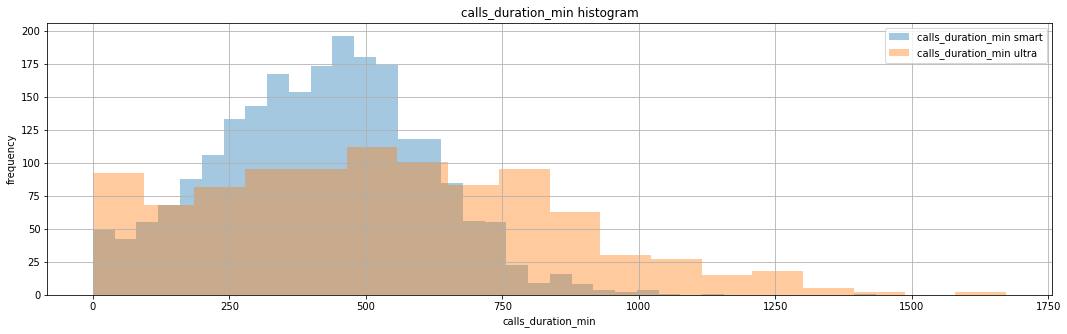

In [50]:
calls_duration_lm = loc_metrics('calls_duration_min')
calls_duration_lm

Для обоих тарифов характерно наличие звонков с нулевой длительностью (непринятые звонки, либо звонки не использовались). Также для обоих тарифов очень близки средние и медианные значения суммарной длительности звонков, что говорит об отсутствии скошенности датасетов в какую-либо сторону. Для тарифа 'ultra' характерно большее значение среднего (примерно на 109 мин) и медианы (примерно на 96 мин), что говорит о том, что клиенты тарифа 'ultra' тратят больше времени на разговоры (примерно на 1.5 часа). Для тарифа 'ultra' также характерно большее значение дисперсии и стандартного отклонения (почти в 2 раза), что также подтверждается большей шириной "колокола" гистограммы распределения времени разговора и большими значениями квартилей - это опять же подтвержает большую длительность разговоров клиентов с тарифом 'ultra' (их бесплатный лимит общения позволяет им это делать). Большинство же клиентов тарифа "smart" стараются придерживаться своего бесплатного лимита длительности звонков (значение третьего квартиля не многим больше значения лимита в 500 минут).

### Анализ количества звонков за месяц

                 calls_qty        smart        ultra
0                    count  2229.000000   985.000000
1                     mean    58.463437    73.392893
2                      std    25.939858    43.916853
3                 variance   672.876243  1928.689990
4                      min     0.000000     0.000000
5         25%_1st_quartile    40.000000    41.000000
6  median_50%_2nd_quartile    60.000000    74.000000
7         75%_3rd_quartile    76.000000   104.000000
8                      max   198.000000   244.000000


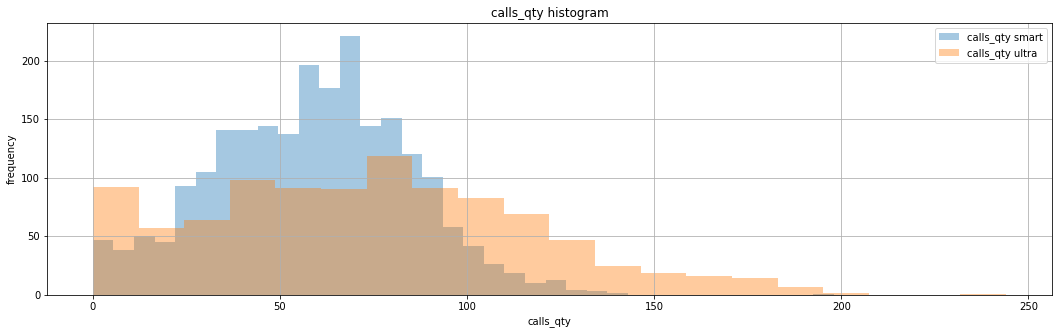

In [51]:
calls_qty_lm = loc_metrics('calls_qty')
calls_qty_lm

Для количества звонков ситуация с гистограммой распределения аналогична количеству минут разговоров. Для обоих тарифов характерно наличие ситуации с нулевым количеством звонков за месяц (один из вариантов -  это клиенты, использующие мобильную сеть для управления умными устройствами, для них важны каналы коммуникации в виде SMS и интернета), частота их повторений довольно близка. Также для обоих тарифов близки средние и медианные значения количества звонков, данные не скошены. Для тарифа 'ultra' характерно большее значение среднего (примерно на 15 звонков) и медианы (примерно на 14 звонков), что говорит о том, что клиенты тарифа 'ultra' чаще делают звонки (примерно на 15 в месяц, или  примерно плюс 2 звонка в день). Для тарифа 'ultra' также характерно большее значение дисперсии и стандартного отклонения, что также подтверждается большей шириной "колокола" гистограммы распределения количества звонков и большими значениями квартилей. 

### Анализ количества отправленных за месяц SMS-сообщений

              messages_qty        smart        ultra
0                    count  2229.000000   985.000000
1                     mean    33.384029    49.363452
2                      std    28.227876    47.804457
3                 variance   796.812958  2285.266143
4                      min     0.000000     0.000000
5         25%_1st_quartile    10.000000     6.000000
6  median_50%_2nd_quartile    28.000000    38.000000
7         75%_3rd_quartile    51.000000    79.000000
8                      max   143.000000   224.000000


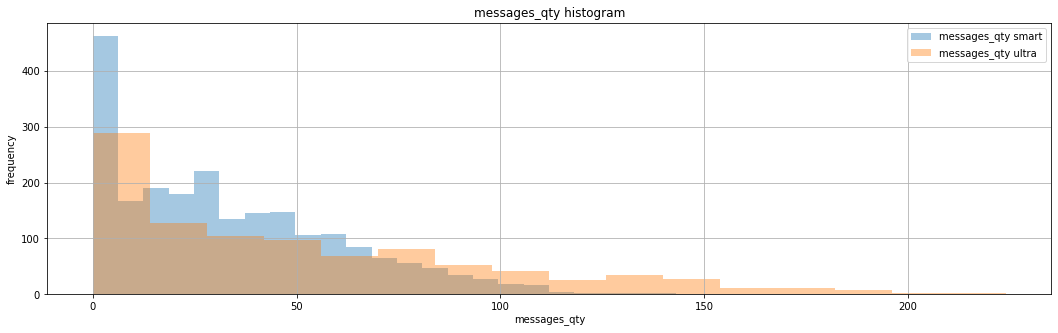

In [52]:
messages_qty_lm = loc_metrics('messages_qty')
messages_qty_lm

Минимальное количество отправленных сообщений для обоих тарифов - 0 (сообщения не использовались). Аналогично предыдущим гистораммам для тарифа 'ultra' также характерно большее значение дисперсии и стандартного отклонения по количеству отправленных сообщений, что также подтверждается большей шириной "колокола" гистограммы распределения и большими значениями квартилей.  При этом для обеих таблиц характерна скошенность вправо (среднее больше для медианы), при этом скошенность более выражена для сообщений тарифа "ultra", что говорит о наличии доли клиентов которые гораздо чаще других отправляют сообщения. Как и в случае с лимитом времени на звонки, клиенты тарифа 'smart' стараются уложиться в лимит бесплатного количества сообщений (50, при значении третьего квартиля 51).

### Анализ объема тарифицируемого интернет-траффика за месяц

                   gb_used        smart       ultra
0                    count  2229.000000  985.000000
1                     mean    16.328847   19.494416
2                      std     5.747061    9.853511
3                 variance    33.028705   97.091686
4                      min     0.000000    0.000000
5         25%_1st_quartile    13.000000   12.000000
6  median_50%_2nd_quartile    17.000000   19.000000
7         75%_3rd_quartile    20.000000   27.000000
8                      max    38.000000   49.000000


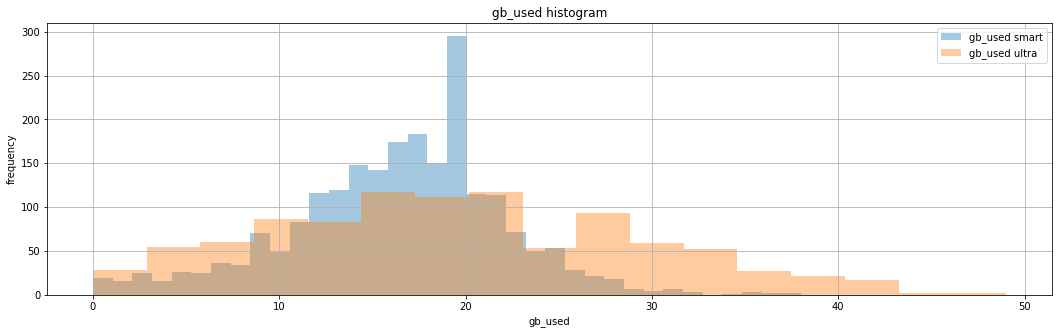

In [53]:
gb_used_lm = loc_metrics('gb_used')
gb_used_lm

Гистограммы распределения для объема тарифицируемого интернет-траффика за месяц имеют нормальный характер, данные не скошены, дисперсия и стандартное отклонение выше для тарифа 'ultra'. Более чем 50% пользователей тарифа 'smart' не хватает выделенного лимита в 15 Гб, а большинство пользователей тарифа "ultra" укладываются в предложенный лимит в 30 Гб (третий квартиль - 27 Гб).

### Вывод

Количество записей для клиентов использующих тариф "smart" больше чем в два раза относительно тарифа "ultra", можно утверждать, что тариф "smart" более популярен ввиду более низкой стоимости абонентской платы. Практически все распределения имеют нормальный характер(длительность звонков, количество звонков, объем тарифицируемого интернет-траффика), за исключением отдельных выбросов. Распределения для количества отправленных сообщений скошены вправо,скошенность наиболее выражена для тарифа "ultra", что говорит о весомой доле клиентов активно использующих SMS. Для всех распределний для тарифа "ultra" характерны более высокие значения дисперсии и стандартного отклонения (наличие более широкого "колокола" распределений) по отношению к тарифу "smart", распределения для тарифа "ultra" более равномерны, их более широкие правые части распределений говорят о более активном использовании услуг связи клиентами тарифа "ultra" - лимиты бесплатного использования услуг при высокой стоимости абонентской платы это позволяют. Можно говорить о том, что большинство клиентов тарифа "ultra" не выходят за лимиты количествва бесплатных минут и сообщений, а клиенты тарифа "smrat" стараются его придерживаться (значения третих квартилей немногим больше заявленных лимитов по голосовой связи и соообщениям по данному тарифу).С интернетом ситуация обстоит сложнее, так как в настоящее время интернет является основным источником связи и зачастую дублирует посредством различных приложений другие каналы. Для тарифа "smart" в более чем половине случаев пользователи выходят за пределы предоставленного лимита бесплатных объемов - трафика не хватает, а для тарифа "ultra" почти в 3/4 случаев пользователи подходят к границе бесплатного лимита в 30 Гб.

## Проверка гипотез

Проведем проверку двух гипотез:

1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; 
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Проверка гипотезы "Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"

Сформулируем нулевую гипотезу H0: "Среднее значение значение выручки тарифа "Смарт" не равно среднему значению выручки тарифа "Ультра"": S_rev_smart  **!=**  S_rev_ultra.

Альтернативная гипотеза гипотезу H1: "Среднее значение значение выручки тарифа "Смарт" равно среднему значению выручки тарифа "Ультра"": S_rev_smart  **=**  S_rev_ultra.

Будем исходить из того, что выборки по разным тарифам не зависят друг от друга; согласно описанию данных в выборке нет пользователей пользующихся или пользовавшихся двумя тарифами (в том числе одновременно). 

Для подсчета вероятности  равенства среднего двух генеральных совокупностей по взятым из них выборкам будем использовать метод scipy.stats.ttest_ind(). Исследуемые выборки разного размера (2229 записей для тарифа "Смарт" и 985 для тарифа "Ультра"), поэтому укажем параметр equal_var = False, однако, также проведем расчет без указания данного параметра. Критический уровень статистической значимости определим в 5%. 

In [54]:
results = st.ttest_ind(
    df_smart['user_rev_month'], 
    df_ultra['user_rev_month'])
print('p-значение: ', results.pvalue)

alpha = .05

if  results.pvalue > alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.4229814360764067e-160


'Не получилось отвергнуть нулевую гипотезу'

In [55]:
results = st.ttest_ind(
    df_smart['user_rev_month'], 
    df_ultra['user_rev_month'],
    equal_var=False)
print('p-значение: ', results.pvalue)

alpha = .05

if results.pvalue > alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250


'Не получилось отвергнуть нулевую гипотезу'

            user_rev_month          smart          ultra
0                    count    2229.000000     985.000000
1                     mean    1289.973531    2070.152284
2                      std     818.404367     376.187114
3                 variance  669785.708006  141516.745079
4                      min     550.000000    1950.000000
5         25%_1st_quartile     550.000000    1950.000000
6  median_50%_2nd_quartile    1023.000000    1950.000000
7         75%_3rd_quartile    1750.000000    1950.000000
8                      max    6770.000000    4800.000000


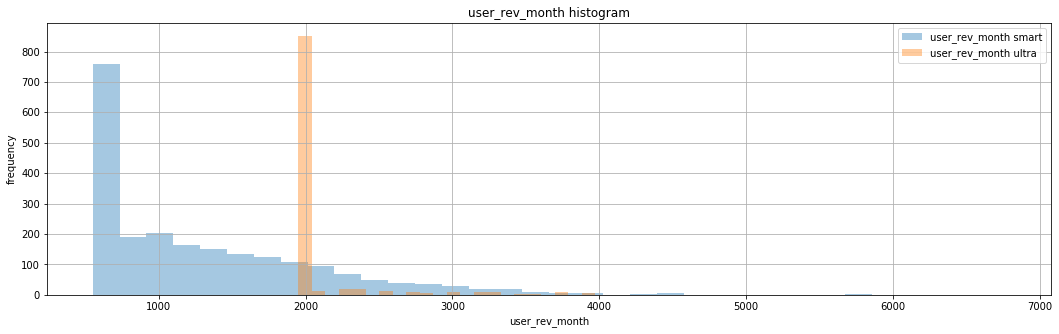

In [56]:
user_rev_month_lm = loc_metrics('user_rev_month')
user_rev_month_lm

Отвергнуть нулевую гипотезу о неравенстве средних выручек для разных тарифов не удалось. Вероятность наступления такого события черезвычайно велика, вследствии того, что вероятность равенства средних выручек черезвычайно мала. Это наглядно демонстрирует гистограмма распределения значений выручек и полученные описательные статистики (в частности средннее значение выручки для двух тарифов). Такое заключение также логически следует из описания тарифных опций. Базовое значение выручки (по сути - абонентская плата в месяц) тарифа "Смарт" практически в 4 раза меньше, чем для тарифа "Ультра" (550 рублей против 1950 рублей). Пользователи тарифа "Смарт" чаще потребляют услуги сверх лимита, и тарифная стоимость таких услуг значительно выше, чем для тарифа "Ультра". Однако, чтобы выручка по тарифу "Смарт" приблизилась хотя бы к величине абонентской платы по тарифу "Ультра", клиент должен потребить значительный объем услуг сверх лимита и заплатить гораздо большую по сравнению с абонентской платой сумму, что невыгодно самому клиенту, выбравшему тариф "Смарт". Выбор данного тарифа в таких условиях неоправдан, в такой ситуации (большой объем потребляемых услуг) пользователь скорее всего будет вынужден сменить тариф.

### Проверка гипотезы "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Сформулируем нулевую гипотезу H0: "Среднее значение выручки в Москве не равно среднему значению выручки в других городах":

S_rev_moscow **!=** S_rev_not_moscow.




Альтернативная гипотеза гипотезу H1: "Среднее значение выручки в Москве равно среднему значению выручки в других городах": 

S_rev_moscow **=** S_rev_not_moscow.

Воспользуемся аналогичным подходом как и при проверке гипотезы с тарифами. Для подсчета вероятности  равенства среднего двух генеральных совокупностей по взятым из них выборкам будем использовать метод scipy.stats.ttest_ind(). Исследуемые выборки разного размера, дисперсия заранее неизвестна, поэтому укажем параметр equal_var = False. Критический уровень статистической значимости определим в 5%. 

Для проверки предложенной гипотезы сформируем две выборки на основе города проживания пользователя. 

In [57]:
df_moscow = df.query('city == "Москва"')
df_not_moscow = df.query('city != "Москва"')

In [58]:
display(len(df_moscow)) # размеры выборок
display(len(df_not_moscow))

611

2603

In [59]:
results = st.ttest_ind(
    df_moscow['user_rev_month'], 
    df_not_moscow['user_rev_month'],
    equal_var=False)
print('p-значение: ', results.pvalue)

alpha = .05

if results.pvalue > alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.5257376663729298


'Отвергаем нулевую гипотезу'

Для проверки предложенной гипотезы сформируем две выборки на основе города проживания пользователя. 

'For Moscow:'

count     611.000000
mean     1546.713584
std       752.088071
min       550.000000
25%       780.500000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: user_rev_month, dtype: float64

'variance_MSK'

565636.467011886

'For Not_Moscow:'

count    2603.000000
mean     1524.936227
std       808.787752
min       550.000000
25%       750.000000
50%      1583.000000
75%      1950.000000
max      6770.000000
Name: user_rev_month, dtype: float64

'variance_not_MSK'

654137.6285218114

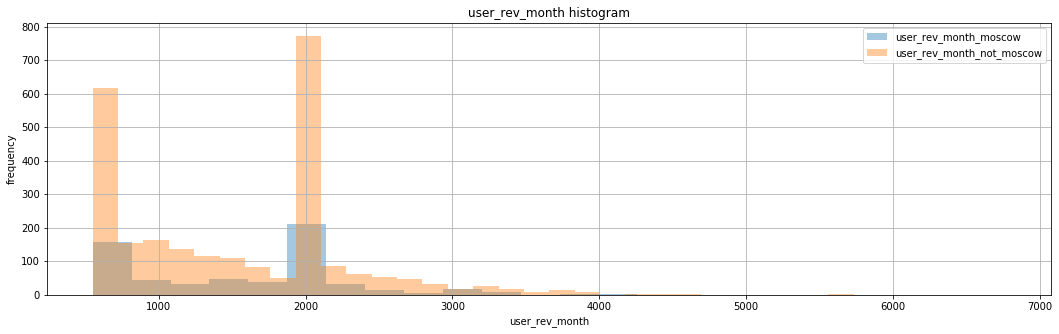

In [60]:
#нахождение описательных статистик и гистограмм разброса для значения выручи в Москве и других городах
display('For Moscow:')
display(df_moscow['user_rev_month'].describe()) 
display('variance_MSK', np.var(df_moscow['user_rev_month'], ddof=1))
display()
display('For Not_Moscow:')
display(df_not_moscow['user_rev_month'].describe())
display('variance_not_MSK', np.var(df_not_moscow['user_rev_month'], ddof=1))
plt.figure(figsize=(18, 5))
sns.distplot(df_moscow['user_rev_month'], kde=False, label='user_rev_month_moscow')
sns.distplot(df_not_moscow['user_rev_month'], kde=False, label='user_rev_month_not_moscow')
plt.grid()
plt.title(label='user_rev_month histogram')
plt.ylabel("frequency")
plt.legend(loc='upper right')
plt.show()

### Вывод

Для полученных данных были проведены проверки двух гипотез с учетом уровня статистической значимости:"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"; "Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов". Для проверки гипотез были сформулированы нулевая и альтернативные гипотезы. В качестве метода проверки был использован метод scipy.stats.ttest_ind() с учетом параметра equal_var=False (так как при анализе выборки достаточно сильно различаются размерами). В обоих случаях нулевая гипотеза неопровергнута. Для гипотезы:"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются" вероятность проявления события близка к единице (что объяснимо исходя из параметров тарифов),  а гипотеза "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов достаточно велика" не подтвердилась (вероятность получения сравнимых уровней выручки достаточна  велика с учетом значения сттистической значимости), что может быть связано с отличием в идентичности поведения клиентов из столицы и других регионов.

## Общий вывод

База исследования  - 5 файлов формата .csv содержащих следующую инфомацию: таблица users (информация о пользователях), таблица calls (информация о звонках), таблица messages (информация о сообщениях), таблица internet (информация об интернет-сессиях), таблица tariffs (информация о тарифах).

Целью исследования является анализ поведения клиентов телекоммуникационной компании на основании выбранного ими тарифного плана. Необходимо также проверить утверждение о различии уровня средней выручки в зависимости от выбранного тарифа и места проживания клиента (Москва/другие города). Результаты исследования могут быть исспользованы для корректировки бюджета рекламных компаний.

В ходе исследования было проведено:
1. Ознакомление с данными и их изучение: явных ошибок и дубликатов в данных не обнаружено. Пропуски присутсвуют только в таблице 'users' в столбце 'churn_date' и не явлются ошибкой. Нулевые интернет-сессии и нулевая длительность звонков также не являются ошибочными данными. В таблице 'internet' обнаружен незаявленный в описании столбец 'Unnamed: 0', значения которого полностью соответствует индексам строк таблицы, столбец удален.
2. Подготовка данных - определние дополнительных параметров для анализа данных: данные по таблицам users (информация о пользователях), таблица calls (информация о звонках), таблица messages (информация о сообщениях) были объеденены в одну таблицу на основании уникального номера клиента и месячных суммарных показателей длительности звонков, их колличества, колличества сообщений и объема интернет траффика; кроме того был сформирован показатель помесячной выручки клиента на основании выбранного тарифа. Объем услуг определялся с учетом порядка принятого оператором связи (минуты окрулялись до целого полного числа, мегабайты до гигабайт суммарно за месяц). Выручка определяласть как сумма абонентской платы и платы за услуги сверх установленного лимита.
3. Анализ поведения клиентов на основе выбранного тарифного плана, включающий анализ суммарной длительности разговора, анализ количества звонков, анализ количества отправленных сообщений, анализ объема интернет-траффика. В ходе анализа были определены статистические характеристики распределений значений для полученных выборок по различным тарифам, а также построены диаграммы распределений.  Практически все распределения имеют нормальный характер(длительность звонков, количество звонков, объем тарифицируемого интернет-траффика), за исключением отдельных выбросов. Распределения для количества отправленных сообщений скошены вправо,скошенность наиболее выражена для тарифа "ultra",. Для все всех распределний для тарифа "ultra" характерны более высокие значения дисперсии и стандартного отклонения  по отношению к тарифу "smart", распределения для тарифа "ultra" более равномерны, их более широкие правые части распределений говорят о более активном использовании услуг связи клиентами тарифа "ultra". Большинство клиентов тарифа "ultra" не выходят за лимиты количествва бесплатных минут и сообщений, а клиенты тарифа "smart" стараются его придерживаться. Для интернет-траффика клиенты с тарифом "smart" в более чем половине случаев выходят за пределы предоставленного лимита бесплатных объемов - трафика не хватает, а для тарифа "ultra" почти в 3/4 случаев пользователи подходят к границе бесплатного лимита в 30 Гб. Интернет используетсся активнее.
4. Для полученных данных были проведены проверки двух гипотез:"Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются"; "Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. В первом случае нулевая гипотеза неопровергнута. Средняя выручка для тарифов "Смарт" и "Ультра" практически всегда различаются. Вероятность же получения значимо неразличимых уровней средней выручки для клиентов из Москвы и клиентов из других регионов достаточно велика с учетом коэффициента статистической значимости. Нулевая гипотеза во втором случае должна быть отвергнута.

Исходя из проведенного исследования можно утверждать, что для увеличения выручки оператора связи необходимо сосредоточчится на рекламных компаниях тарифа "Ультра" - его выручка больше, проведение же рекламных компаний не должно быть привязано к конкретному региону (в том числе к Москве).